## ML Project (MID SEM)

We start by importing all the required libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset

In [90]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Basic Analysis of Dataset

In [74]:
# data on all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [75]:
# statistics of all features
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### Checking for null values

In [76]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

We can see that Teacher_Quality,Parental_Education_Level,Distance_from_Home columns have null values all are categorical columns so we will replace by mode

In [77]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']: 
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
    else: 
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Checking existence of duplicates:

In [91]:
df = df.drop_duplicates()
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [92]:
num_cols=[col for col in df.columns if df[col].dtype in ['int64', 'float64']]

### Outlier Detection and Removal

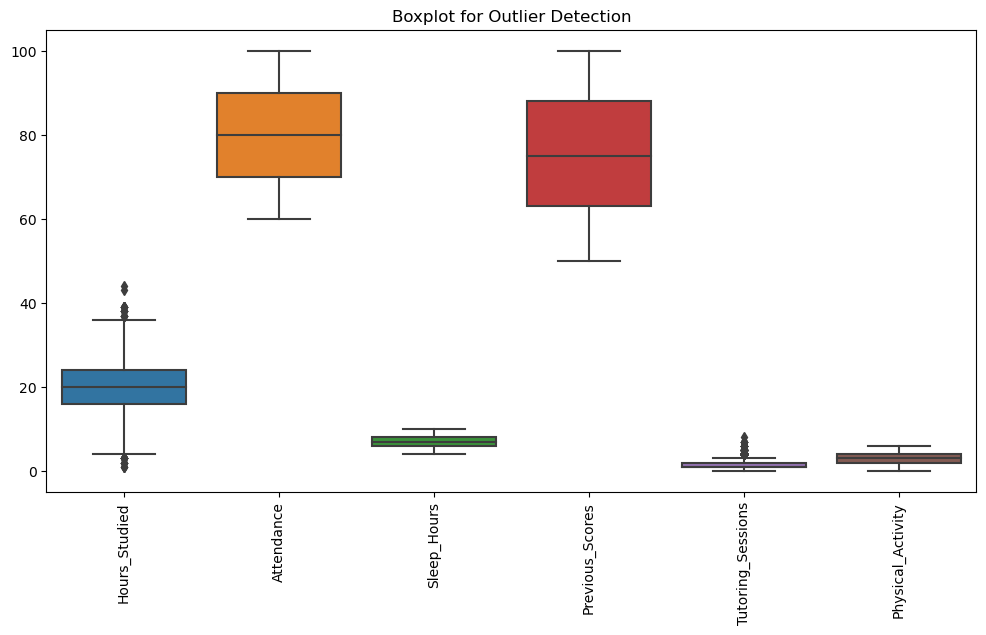

In [81]:
plt.figure(figsize=(12,6))
cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col!='Exam_Score']
sns.boxplot(data=df[cols])
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

We notice a few outliers in the boxplot. Capping can be done to ensure the outliers do not affect the model.

In [82]:
# Select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('Exam_Score')  

# Capping outliers
for column in num_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])
    df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])

print("\nSummary of numeric data after capping outliers:")
print(df[num_cols].describe())



Summary of numeric data after capping outliers:
       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.971848    79.977448      7.02906        75.070531   
std         5.951016    11.547475      1.46812        14.399784   
min         4.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        36.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity  
count        6607.000000        6607.000000  
mean            1.436355           2.967610  
std             1.096018           1.031231  
min             0.000000           0.000000  
25%             1.000000           2.000000  
50%             1.000000           3.000000  
75%             2.000000 

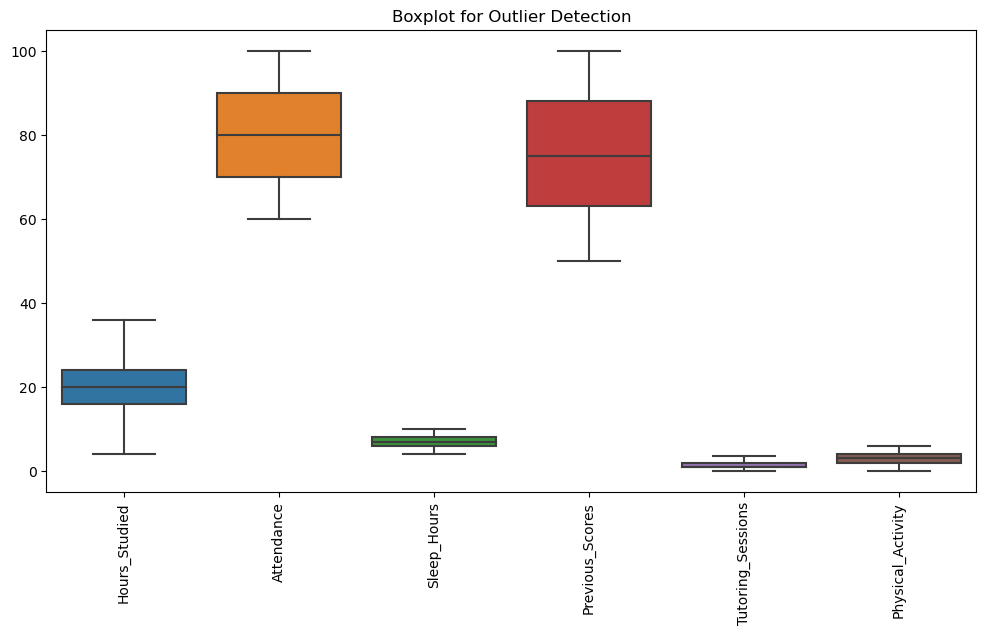

In [83]:
plt.figure(figsize=(12,6))
cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col != 'Exam_Score']
sns.boxplot(data=df[cols])
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

### Exploratory Data Analysis

#### Univariate Analysis

#### Numerical Features

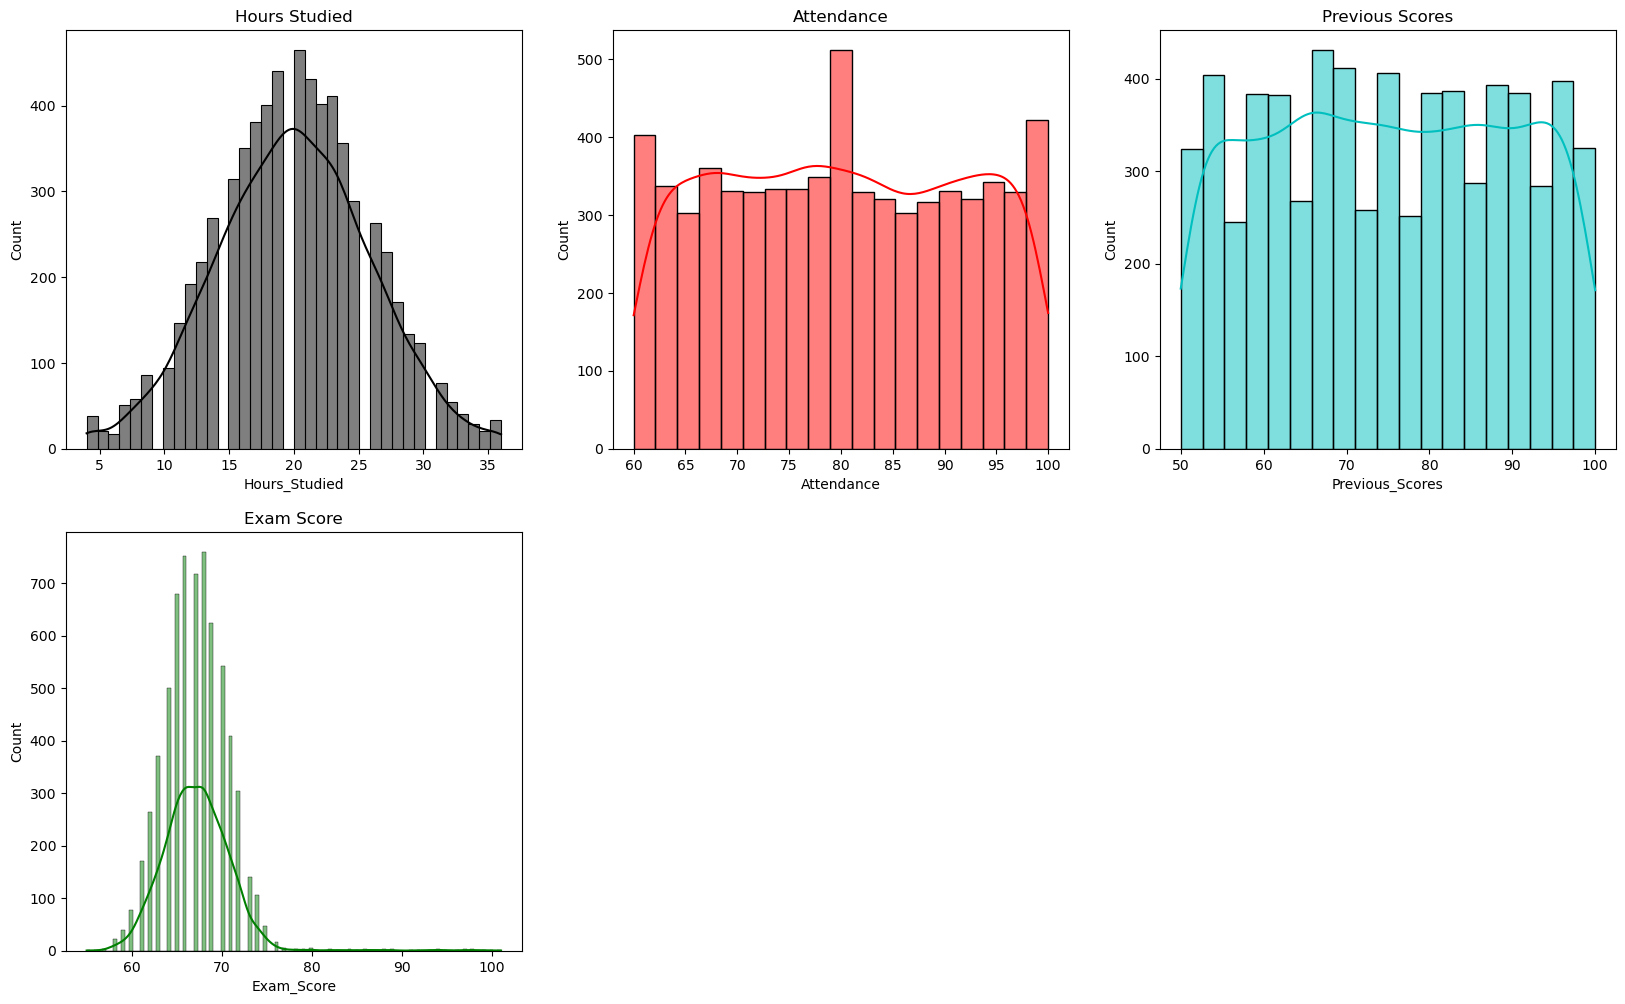

In [85]:
colors = ['k', 'r', 'c', 'g']
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col not in ['Tutoring_Sessions','Physical_Activity','Sleep_Hours'] ]
plt.figure(figsize=(20, 25))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    plt.title(' '.join(col.split('_')).title())
    sns.histplot(df[col], kde=True, color=colors[i % len(colors)])
plt.show()

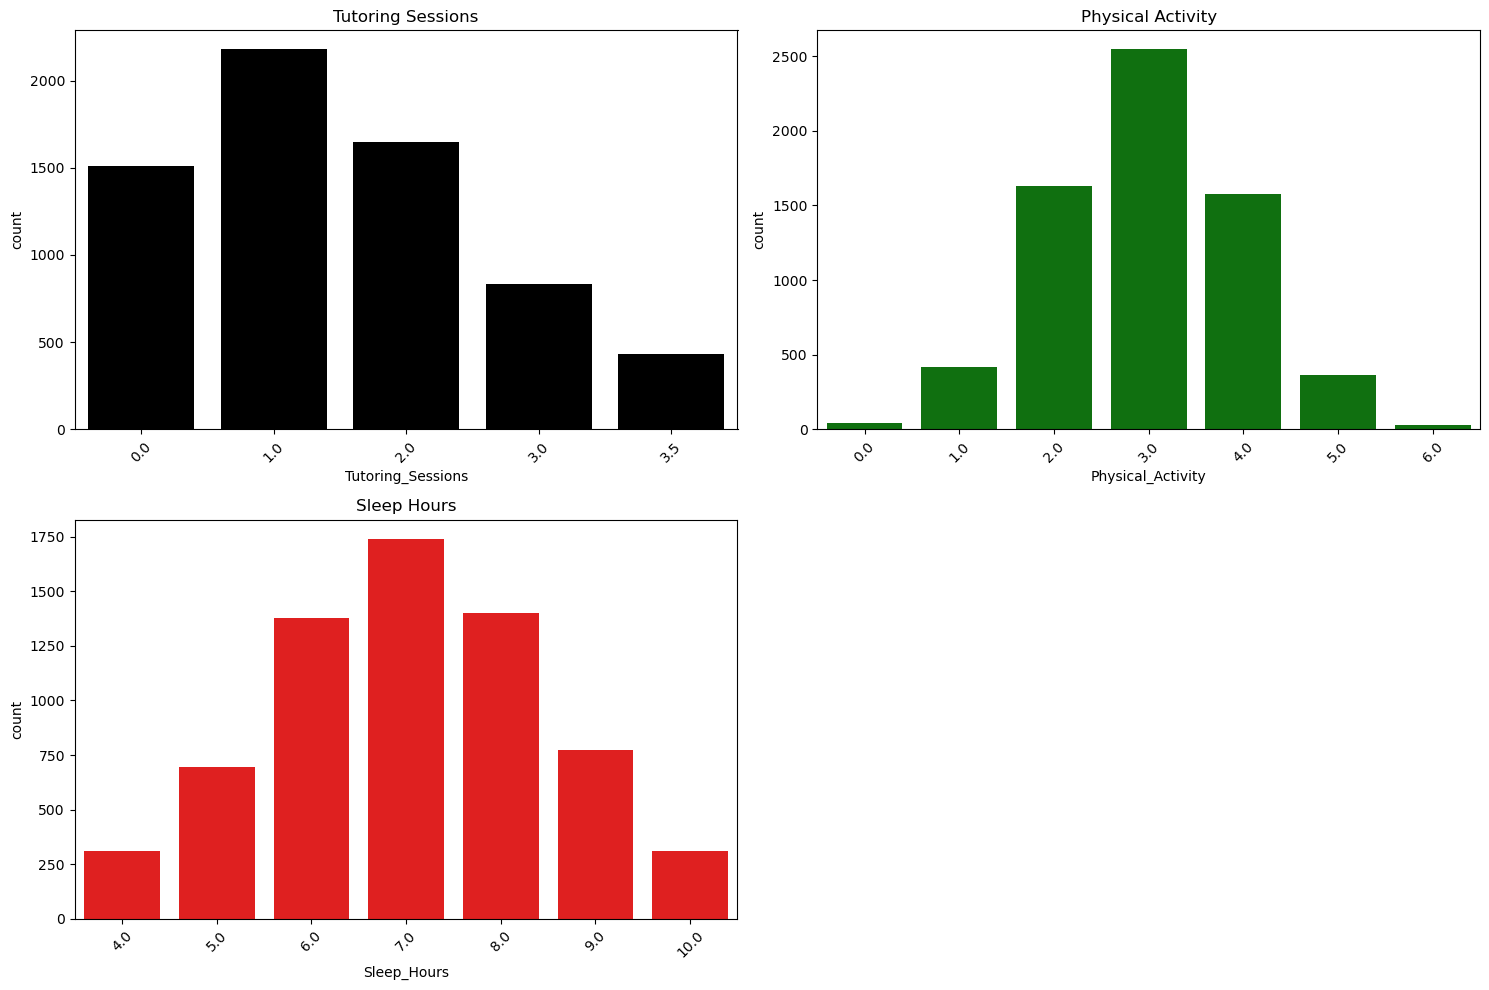

In [86]:
import math

colors = ['k', 'g', 'r', 'c']
cat_cols = ['Tutoring_Sessions','Physical_Activity','Sleep_Hours']
n_cols = 2 
n_rows = math.ceil(len(cat_cols) / n_cols) 

plt.figure(figsize=(15, n_rows * 5)) 

for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.title(' '.join(col.split('_')).title())
    sns.countplot(x=df[col], color=colors[i % len(colors)])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Categorical Features

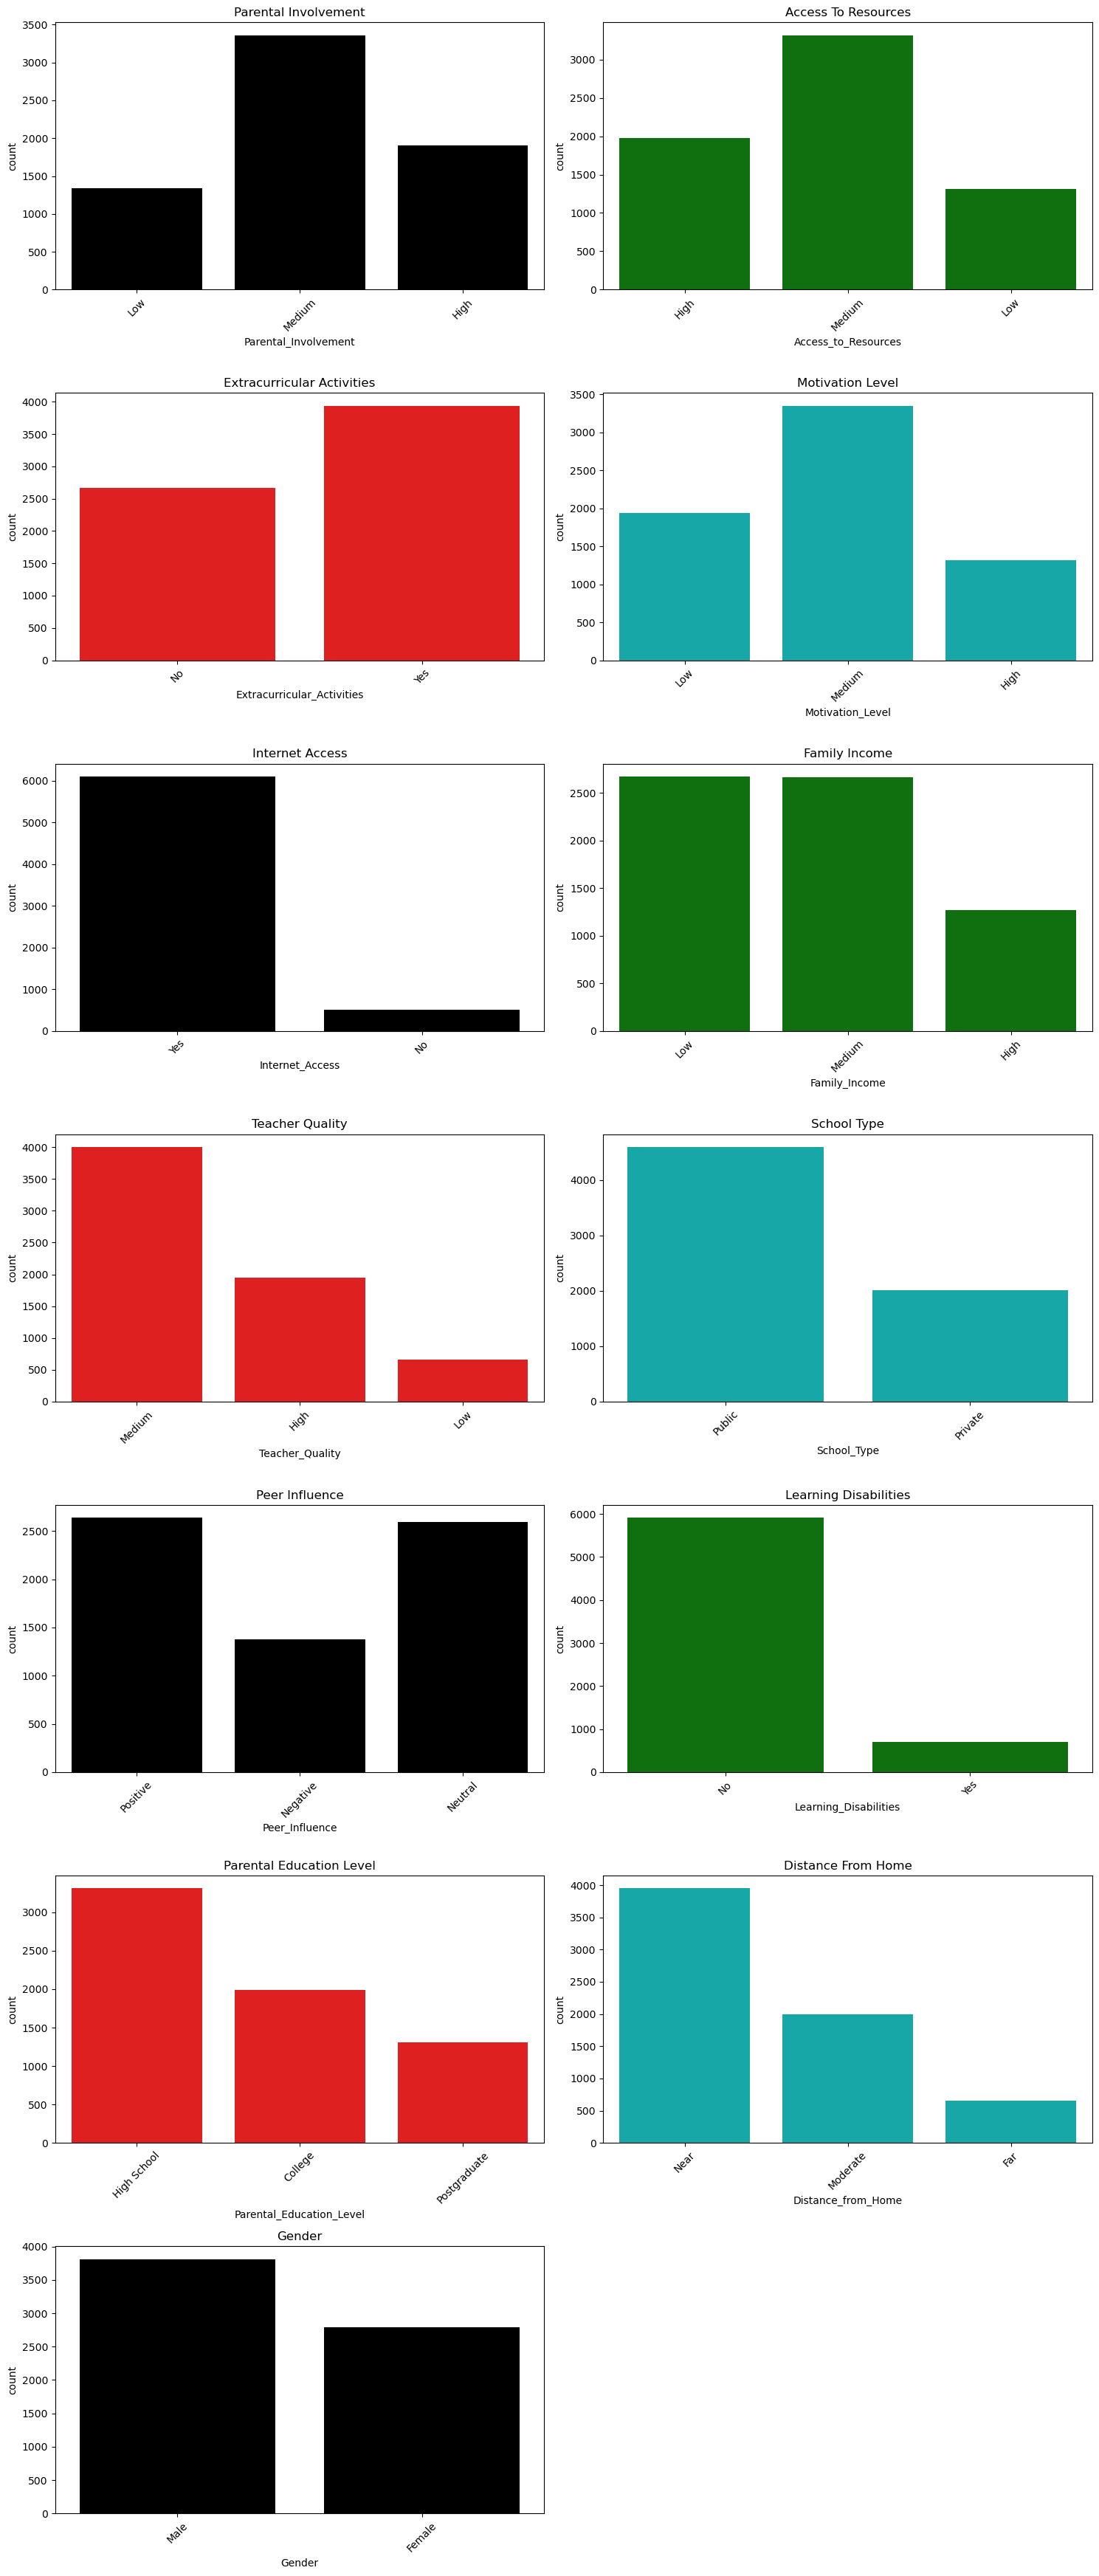

In [43]:
import math

colors = ['k', 'g', 'r', 'c']
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
n_cols = 2 
n_rows = math.ceil(len(cat_cols) / n_cols) 

plt.figure(figsize=(15, n_rows * 5)) 

for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.title(' '.join(col.split('_')).title())
    sns.countplot(x=df[col], color=colors[i % len(colors)])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### Distribution of classes of Target

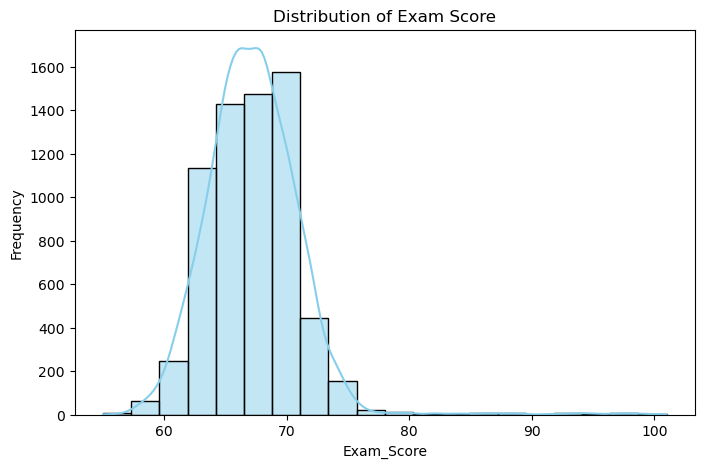

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df['Exam_Score'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Exam Score')
plt.xlabel('Exam_Score')
plt.ylabel('Frequency')
plt.show()


#### Bivariate Analysis

#### Numerical Features

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Exam_Score')  # remove target

plt.figure(figsize=(15, len(num_cols)*4))

for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 1, i + 1)
    sns.scatterplot(x=df[col], y=df['Exam_Score'])
    plt.title(f'{col} vs Exam Score')
    plt.xlabel(col)
    plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()


#### Categorical Features

In [ ]:
palette = 'Set2'

n_cols = 1
n_rows = math.ceil(len(cat_cols) / n_cols)

plt.figure(figsize=(15, n_rows * 5))

for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(x=col, y='Exam_Score', data=df, palette=palette)
    plt.title(" ".join(col.split('_')).title())
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [93]:
from sklearn.preprocessing import LabelEncoder
ordinal_cols = ['Parental_Involvement', 'Motivation_Level', 'Teacher_Quality',
                'Parental_Education_Level', 'Family_Income', 'Distance_from_Home',
                'Peer_Influence']

for col in ordinal_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

nominal_cols = ['Gender', 'School_Type', 'Learning_Disabilities',
                'Internet_Access', 'Extracurricular_Activities', 'Access_to_Resources']

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

#### Multivariate Analysis

We plot the heatmap for the dataset to see the correlation between features

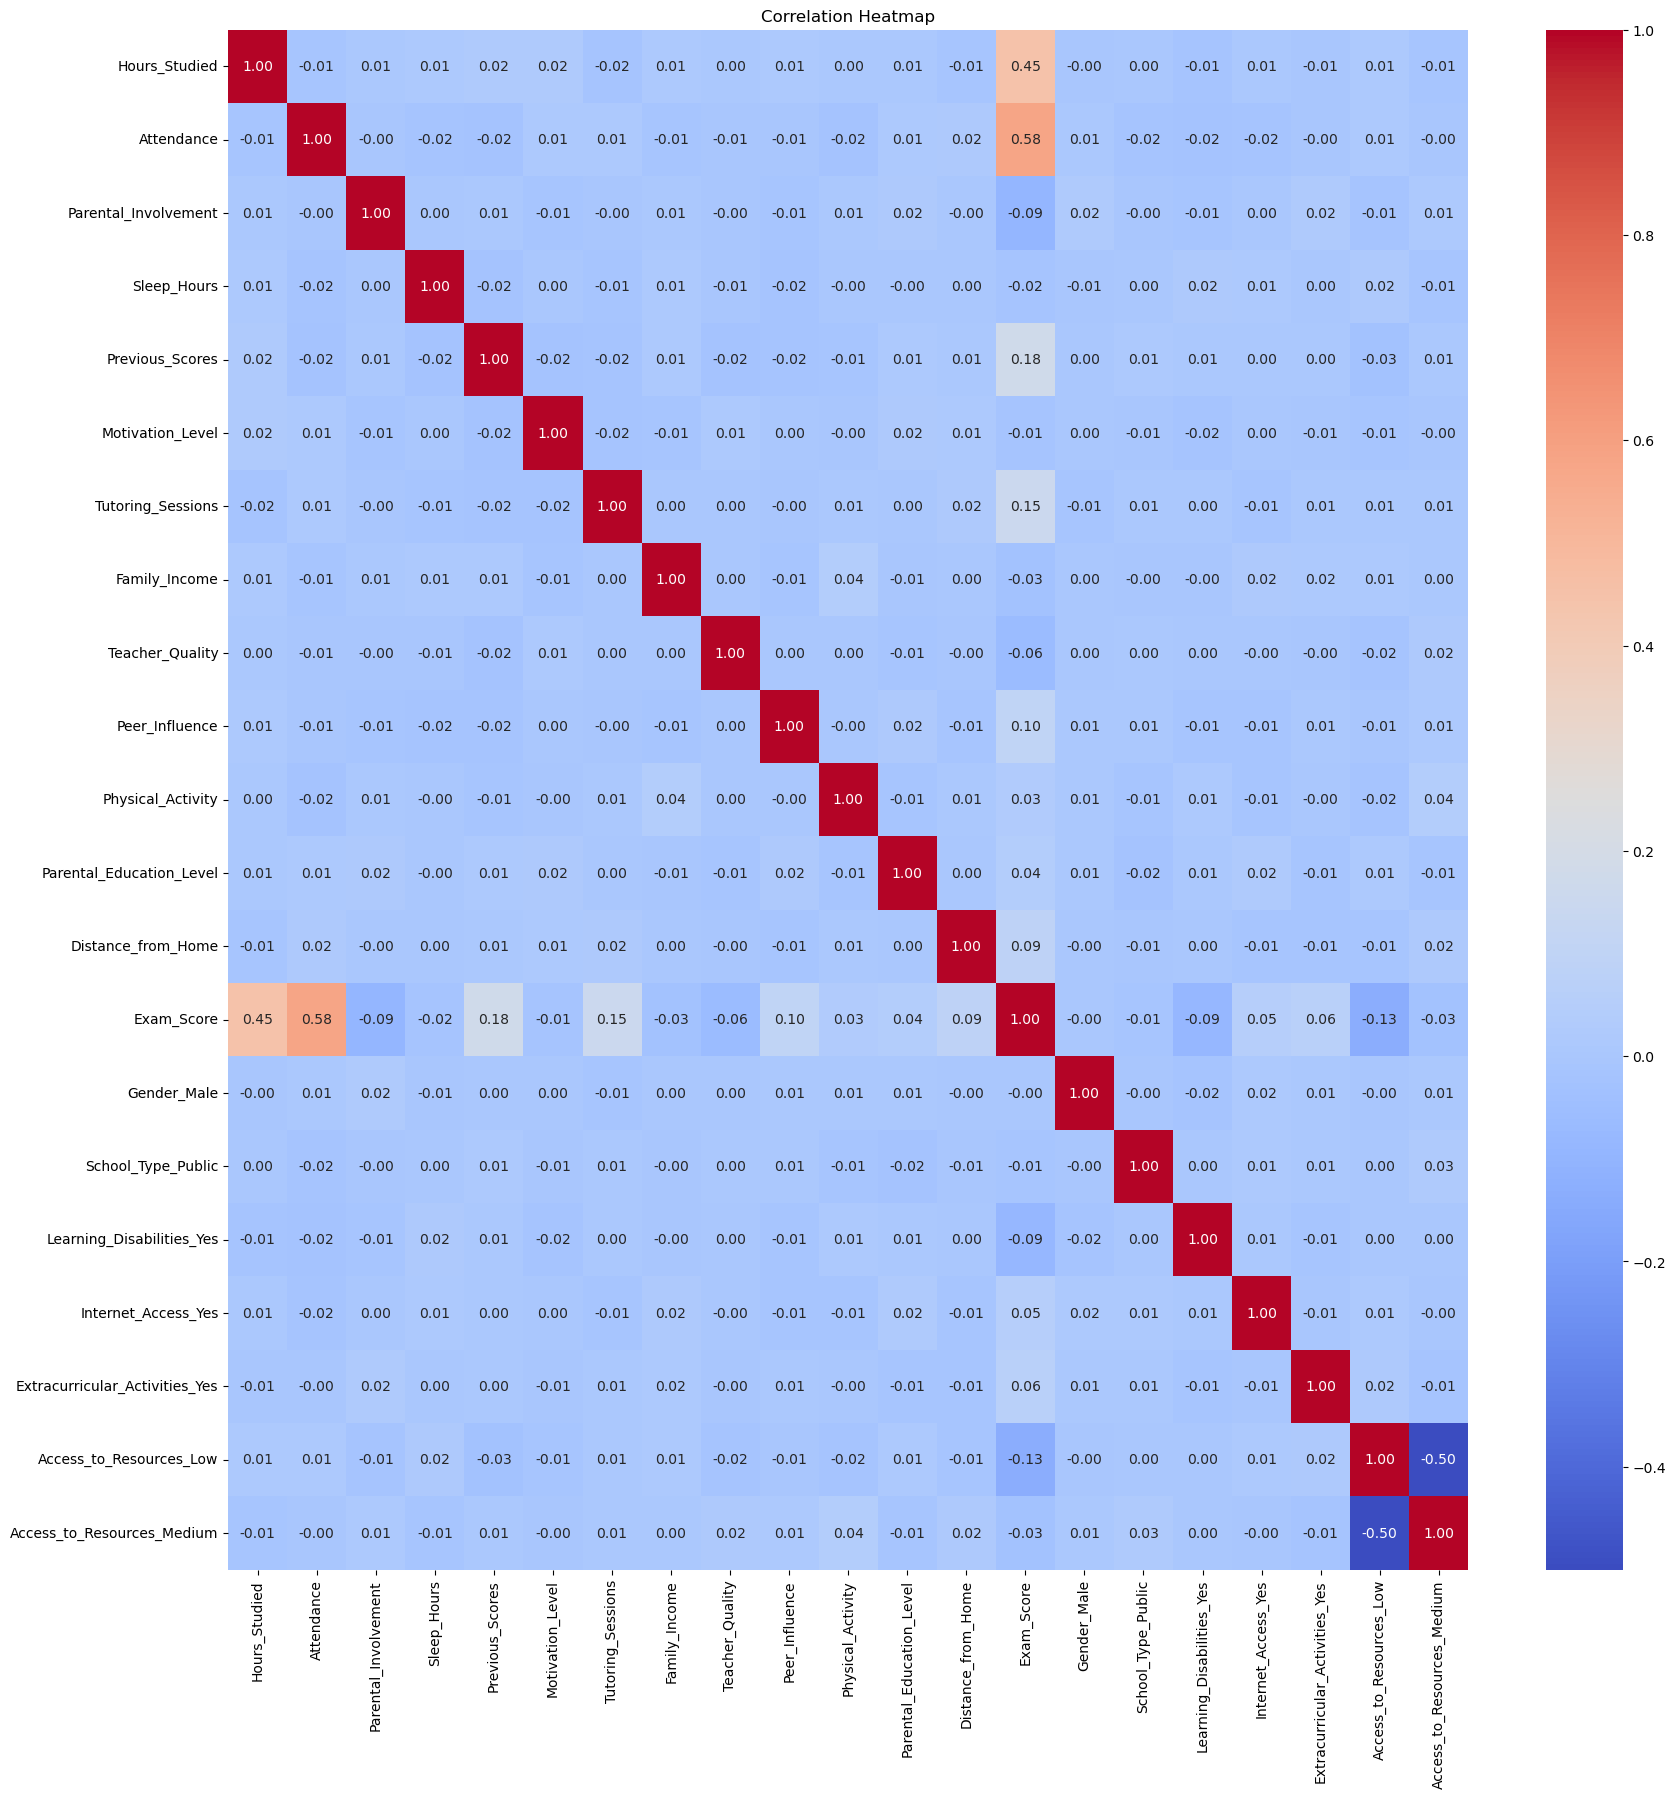

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

we are selecting all the features as maximum correlation is 0.58

In [94]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in num_cols:
    df[col] = sc.fit_transform(df[col].values.reshape(-1, 1))
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,...,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Learning_Disabilities_Yes,Internet_Access_Yes,Extracurricular_Activities_Yes,Access_to_Resources_Low,Access_to_Resources_Medium
0,0.504942,0.348375,1,-0.019796,-0.143800,1,-1.213934,1,2,2,...,1,2,-0.060578,True,True,False,True,False,False,False
1,-0.162822,-1.383736,1,0.661399,-1.116110,1,0.411451,2,2,0,...,0,1,-1.602931,False,True,False,True,False,False,True
2,0.671882,1.560853,2,-0.019796,1.106313,2,0.411451,2,2,1,...,2,2,1.738833,True,True,False,True,True,False,True
3,1.506587,0.781403,1,0.661399,1.592469,2,-0.401242,2,2,0,...,1,1,0.967657,True,True,False,True,True,False,True
4,-0.162822,1.041220,2,-0.700990,-0.699406,2,1.224144,2,0,1,...,0,2,0.710598,False,True,False,True,True,False,True


## MODEL TRAINING

In [62]:
X=df.drop('Exam_Score',axis=1)
y=df['Exam_Score']

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train_r = X_train  
X_test_r = X_test

# Initialize and fit the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_r, y_train)

# Predict on train and test sets
y_train_pred = rf_model.predict(X_train_r)
y_test_pred = rf_model.predict(X_test_r)

train_acc = r2_score(y_train, y_train_pred)
test_acc = r2_score(y_test, y_test_pred)

print(f"r2 score for train: {train_acc:.2f}")
print(f"r2 score for test: {test_acc:.2f}")
print(f"mse score for train: {mean_squared_error(y_train, y_train_pred):.2f}")
print(f"mse score for test: {mean_squared_error(y_test, y_test_pred):.2f}")

r2 score for train: 0.94
r2 score for test: 0.65
mse score for train: 0.87
mse score for test: 4.91


In [70]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error for test:", mse)
print("R² Score for test:", r2)

Mean Squared Error: 4.067304323358393
R² Score: 0.712254441488611
